In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [257]:
data_file = "conso.txt"

In [258]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

def save_text(filename):
    f = open(filename, "w")
    f.write(text)
    f.close()


#read_text(data_file)
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [259]:
text='test'
filename='text.txt'
#save_text(filename)

In [260]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [261]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


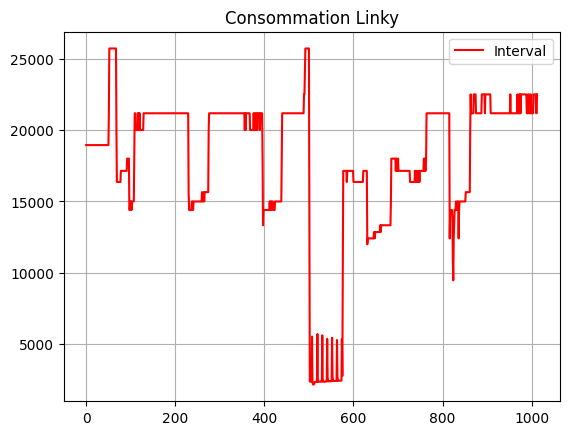

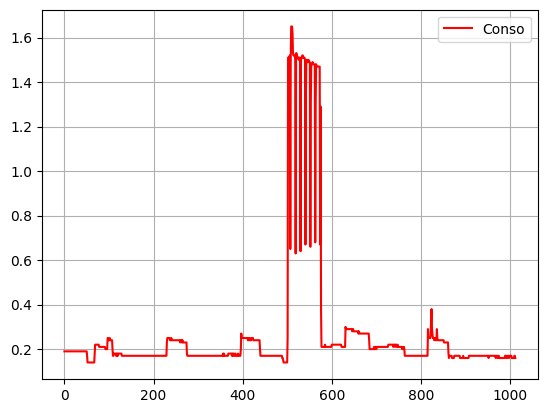

In [262]:

plt.title('Consommation Linky')
plt.plot(data['interval'], color='red',label='Interval')
plt.grid()
plt.legend()
plt.show()
plt.plot(data['Conso'], color='red',label='Conso')
plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [263]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [264]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142327 entries, 0 to 142326
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Interval  142327 non-null  int64  
 1   kWh       142327 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.2 MB


In [265]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
142322,26817,0.13
142323,27022,0.13
142324,26156,0.14
142325,27236,0.13


<Axes: >

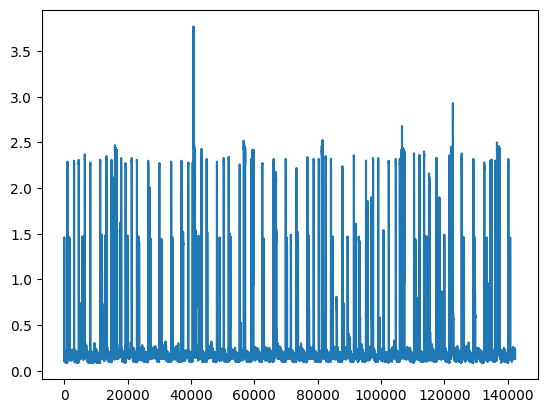

In [266]:
conso_data['kWh'].plot()

In [267]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
142322,26817,0.13,26.817,134.243204,3361911204
142323,27022,0.13,27.022,133.224780,3361938226
142324,26156,0.14,26.156,137.635724,3361964382
142325,27236,0.13,27.236,132.178000,3361991618


In [268]:
# index dernier echantillon
l=len(conso_data)-1
l

142326

In [269]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

3362018586000

In [270]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2024, 3, 7, 1, 43, 42, 153911)

In [271]:
old

False

In [272]:
if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)

conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142327 entries, 0 to 142326
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Interval   142327 non-null  int64         
 1   kWh        142327 non-null  float64       
 2   sec        142327 non-null  float64       
 3   Wh         142327 non-null  float64       
 4   cumul(ms)  142327 non-null  int64         
 5   dates      142327 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 6.5 MB


In [273]:
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:44:08.442911,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:44:34.685911,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:45:00.570911,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:45:26.324911,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:45:52.098911,07/03/2024
...,...,...,...,...,...,...,...
142322,26817,0.13,26.817,134.243204,3361911204,2024-04-14 23:35:33.357911,14/04/2024
142323,27022,0.13,27.022,133.224780,3361938226,2024-04-14 23:36:00.379911,14/04/2024
142324,26156,0.14,26.156,137.635724,3361964382,2024-04-14 23:36:26.535911,14/04/2024
142325,27236,0.13,27.236,132.178000,3361991618,2024-04-14 23:36:53.771911,14/04/2024


In [274]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates  \
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 01:44:08.442911   
 
          days  
 0  07/03/2024  ,
         Interval   kWh     sec          Wh   cumul(ms)  \
 142326     26968  0.13  26.968  133.491546  3362018586   
 
                             dates        days  
 142326 2024-04-14 23:37:20.739911  14/04/2024  )

In [275]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day, month, year

('14/04/2024', 4, 2024)

In [276]:
conso_data[conso_data['days']==day]

,Interval,kWh,sec,Wh,cumul(ms),dates,days
139106,26702,0.13,26.702,134.821362,3276988274,2024-04-14 00:00:10.427911,14/04/2024
139107,26929,0.13,26.929,133.684875,3277015203,2024-04-14 00:00:37.356911,14/04/2024
139108,25215,0.14,25.215,142.772159,3277040418,2024-04-14 00:01:02.571911,14/04/2024
139109,25761,0.14,25.761,139.746128,3277066179,2024-04-14 00:01:28.332911,14/04/2024
139110,26286,0.14,26.286,136.955033,3277092465,2024-04-14 00:01:54.618911,14/04/2024
...,...,...,...,...,...,...,...
142322,26817,0.13,26.817,134.243204,3361911204,2024-04-14 23:35:33.357911,14/04/2024
142323,27022,0.13,27.022,133.224780,3361938226,2024-04-14 23:36:00.379911,14/04/2024
142324,26156,0.14,26.156,137.635724,3361964382,2024-04-14 23:36:26.535911,14/04/2024
142325,27236,0.13,27.236,132.178000,3361991618,2024-04-14 23:36:53.771911,14/04/2024


In [277]:
day

'14/04/2024'

In [278]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:44:08.442911,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:44:34.685911,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:45:00.570911,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:45:26.324911,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:45:52.098911,07/03/2024
...,...,...,...,...,...,...,...
142322,26817,0.13,26.817,134.243204,3361911204,2024-04-14 23:35:33.357911,14/04/2024
142323,27022,0.13,27.022,133.224780,3361938226,2024-04-14 23:36:00.379911,14/04/2024
142324,26156,0.14,26.156,137.635724,3361964382,2024-04-14 23:36:26.535911,14/04/2024
142325,27236,0.13,27.236,132.178000,3361991618,2024-04-14 23:36:53.771911,14/04/2024


In [279]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
grouped


In [280]:
# count elements in each group => conso in watts => convert to kW
(grouped.count()/1000)

,kWh
days,
07/03/2024,3.150
08/03/2024,3.751
09/03/2024,3.083
10/03/2024,3.534
11/03/2024,4.548
12/03/2024,3.549
13/03/2024,3.536
14/03/2024,3.660
15/03/2024,3.561


In [281]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean


kWh    0.317528
dtype: float64

In [282]:
# mean by day from 07/03
mean=(grouped.count()/1000).mean()
mean

kWh    3.64941
dtype: float64

In [283]:
filename='conso_par_jour.csv'
df_grp = grouped.count()/1000
df_grp.to_csv(filename)
filename='../conso_par_jour.csv'
df_grp.to_csv(filename)

In [284]:
df_grp

,kWh
days,
07/03/2024,3.150
08/03/2024,3.751
09/03/2024,3.083
10/03/2024,3.534
11/03/2024,4.548
12/03/2024,3.549
13/03/2024,3.536
14/03/2024,3.660
15/03/2024,3.561


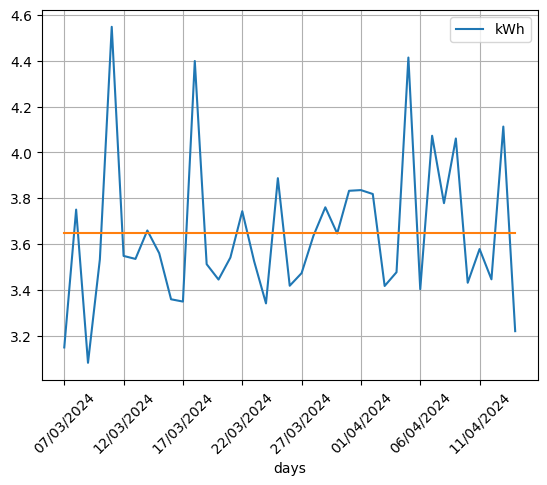

In [342]:
df_grp.plot()#kind='bar')
plt.plot((0,len(df_grp)-1),(mean,mean))
plt.xticks(rotation=45)
plt.grid()


In [286]:
#manuel
#day = '11/03/2024'


In [287]:
# conso day
conso_day = conso_data[conso_data['days']==day]
len(conso_day)

3221

In [288]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days
139106,26702,0.13,26.702,134.821362,3276988274,2024-04-14 00:00:10.427911,14/04/2024
139107,26929,0.13,26.929,133.684875,3277015203,2024-04-14 00:00:37.356911,14/04/2024
139108,25215,0.14,25.215,142.772159,3277040418,2024-04-14 00:01:02.571911,14/04/2024
139109,25761,0.14,25.761,139.746128,3277066179,2024-04-14 00:01:28.332911,14/04/2024
139110,26286,0.14,26.286,136.955033,3277092465,2024-04-14 00:01:54.618911,14/04/2024
...,...,...,...,...,...,...,...
142322,26817,0.13,26.817,134.243204,3361911204,2024-04-14 23:35:33.357911,14/04/2024
142323,27022,0.13,27.022,133.224780,3361938226,2024-04-14 23:36:00.379911,14/04/2024
142324,26156,0.14,26.156,137.635724,3361964382,2024-04-14 23:36:26.535911,14/04/2024
142325,27236,0.13,27.236,132.178000,3361991618,2024-04-14 23:36:53.771911,14/04/2024


In [289]:
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [290]:
conso_day.head(1).dates, conso_day.tail(1).dates


(139106   2024-04-14 00:00:10.427911
 Name: dates, dtype: datetime64[ns],
 142326   2024-04-14 23:37:20.739911
 Name: dates, dtype: datetime64[ns])

In [291]:
conso_day.loc[:,'dates']

139106   2024-04-14 00:00:10.427911
139107   2024-04-14 00:00:37.356911
139108   2024-04-14 00:01:02.571911
139109   2024-04-14 00:01:28.332911
139110   2024-04-14 00:01:54.618911
                    ...            
142322   2024-04-14 23:35:33.357911
142323   2024-04-14 23:36:00.379911
142324   2024-04-14 23:36:26.535911
142325   2024-04-14 23:36:53.771911
142326   2024-04-14 23:37:20.739911
Name: dates, Length: 3221, dtype: datetime64[ns]

In [292]:
conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
conso_day
df= conso_day.set_index('heure')
df

C:\Users\jean\AppData\Local\Temp\ipykernel_26500\2932063292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))


,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:10,26702,0.13,26.702,134.821362,3276988274,2024-04-14 00:00:10.427911,14/04/2024
0:0:37,26929,0.13,26.929,133.684875,3277015203,2024-04-14 00:00:37.356911,14/04/2024
0:1:2,25215,0.14,25.215,142.772159,3277040418,2024-04-14 00:01:02.571911,14/04/2024
0:1:28,25761,0.14,25.761,139.746128,3277066179,2024-04-14 00:01:28.332911,14/04/2024
0:1:54,26286,0.14,26.286,136.955033,3277092465,2024-04-14 00:01:54.618911,14/04/2024
...,...,...,...,...,...,...,...
23:35:33,26817,0.13,26.817,134.243204,3361911204,2024-04-14 23:35:33.357911,14/04/2024
23:36:0,27022,0.13,27.022,133.224780,3361938226,2024-04-14 23:36:00.379911,14/04/2024
23:36:26,26156,0.14,26.156,137.635724,3361964382,2024-04-14 23:36:26.535911,14/04/2024


In [293]:
here = now.strftime('%H:%M:%S')
here, len(df)/1000

('23:37:22', 3.221)

In [294]:
conso_jour=len(df['kWh'])

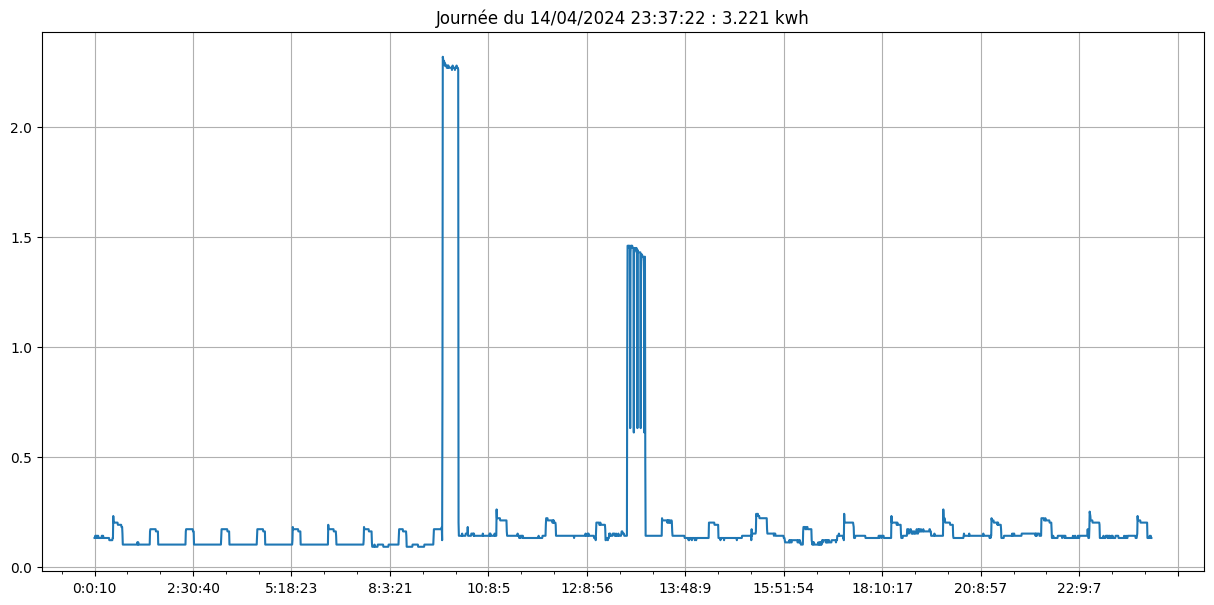

In [295]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
plt.grid()

In [296]:
df['power']=[y for x,y in zip(df['Interval'],df['kWh'])]

In [297]:
df['power']

heure
0:0:10      0.13
0:0:37      0.13
0:1:2       0.14
0:1:28      0.14
0:1:54      0.14
            ... 
23:35:33    0.13
23:36:0     0.13
23:36:26    0.14
23:36:53    0.13
23:37:20    0.13
Name: power, Length: 3221, dtype: float64

<Axes: xlabel='heure'>

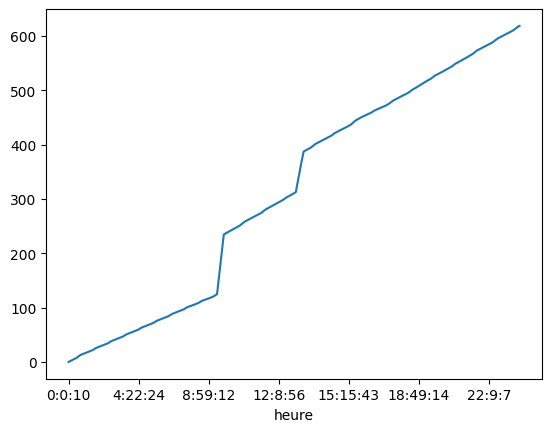

In [298]:
evo=df['power'].cumsum()
evo.plot()

104

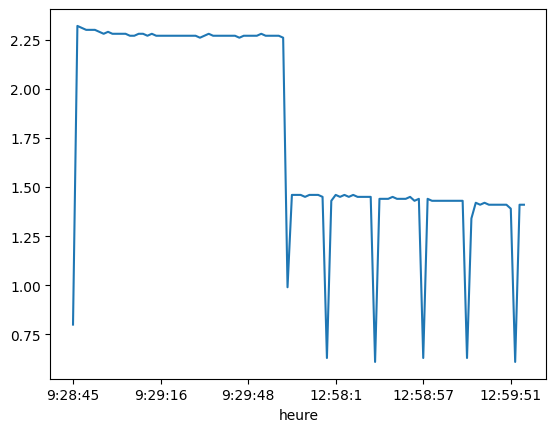

In [299]:
# bouilloire, microondes, four
filter=(.5<df['kWh'])
pic_high = df[filter]
pic_high['kWh'].plot()
len(pic_high)

2346

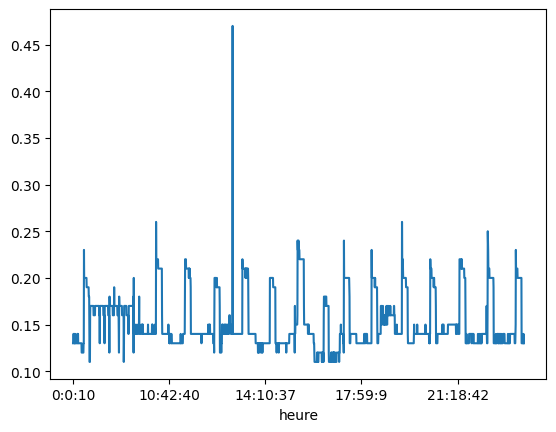

In [300]:
# frigo, moteur volet
pic_middle = df[(0.1<df['kWh']) & (df['kWh']<=.5)]
pic_middle['kWh'].plot()
len(pic_middle) # wh

3117

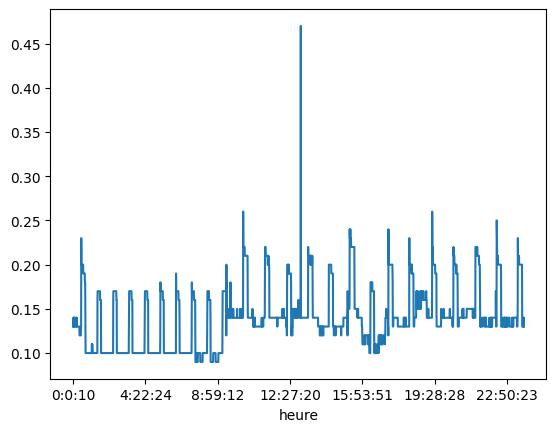

In [301]:
# pics frigo par jour
filter = (df['kWh']<=0.5)
pic_low = df[filter]
pic_low['kWh'].plot()
len(pic_low) # wh

In [302]:
time = conso_data['dates']
time


0        2024-03-07 01:44:08.442911
1        2024-03-07 01:44:34.685911
2        2024-03-07 01:45:00.570911
3        2024-03-07 01:45:26.324911
4        2024-03-07 01:45:52.098911
                    ...            
142322   2024-04-14 23:35:33.357911
142323   2024-04-14 23:36:00.379911
142324   2024-04-14 23:36:26.535911
142325   2024-04-14 23:36:53.771911
142326   2024-04-14 23:37:20.739911
Name: dates, Length: 142327, dtype: datetime64[ns]

In [303]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [304]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [305]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

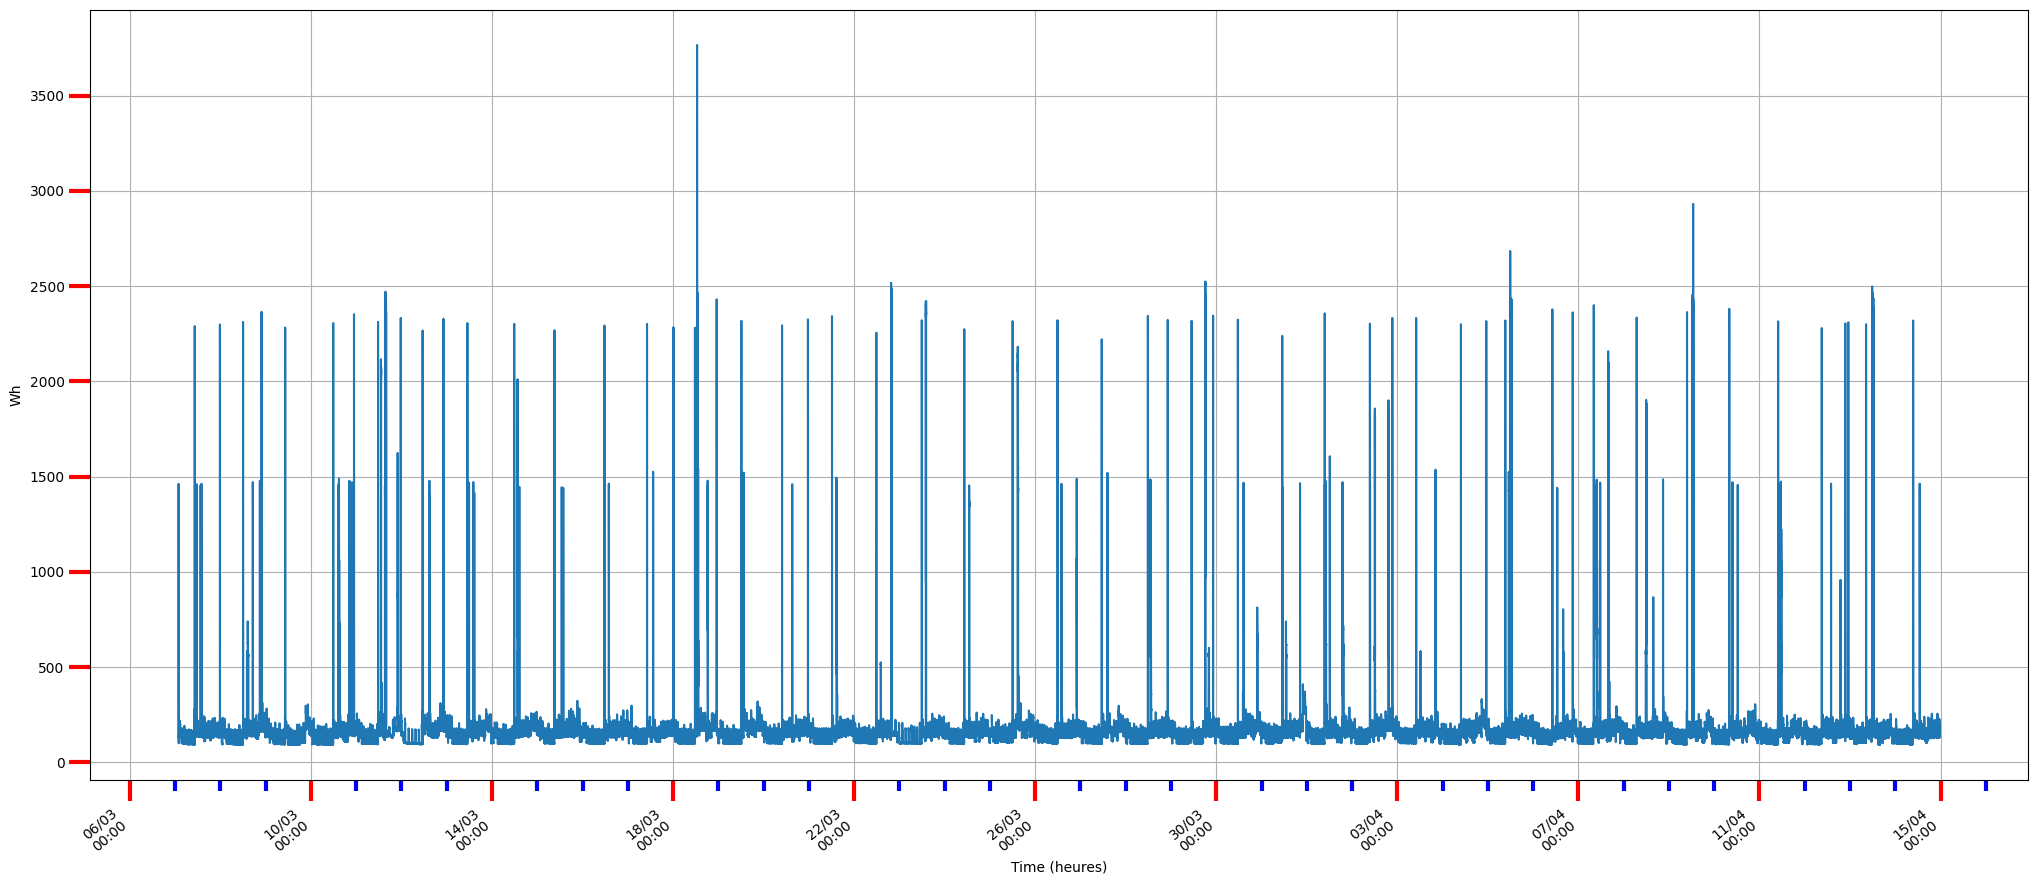

In [306]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [307]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates,days
142326,26968,0.13,26.968,133.491546,3362018586,2024-04-14 23:37:20.739911,14/04/2024


In [308]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

3362018586000

# Slice of last 1 kWh

In [309]:
l = len(conso_data)  # total watt consommés
l

142327

In [310]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(142327, 1000)

In [311]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [312]:
data = conso_data.tail(taille)
len(data),data

(1000,
         Interval   kWh     sec          Wh   cumul(ms)  \
 141327     31230  0.12  31.230  115.273775  3337704845   
 141328     31262  0.12  31.262  115.155780  3337736107   
 141329     31224  0.12  31.224  115.295926  3337767331   
 141330     31261  0.12  31.261  115.159464  3337798592   
 141331     31158  0.12  31.158  115.540150  3337829750   
 ...          ...   ...     ...         ...         ...   
 142322     26817  0.13  26.817  134.243204  3361911204   
 142323     27022  0.13  27.022  133.224780  3361938226   
 142324     26156  0.14  26.156  137.635724  3361964382   
 142325     27236  0.13  27.236  132.178000  3361991618   
 142326     26968  0.13  26.968  133.491546  3362018586   
 
                             dates        days  
 141327 2024-04-14 16:52:06.998911  14/04/2024  
 141328 2024-04-14 16:52:38.260911  14/04/2024  
 141329 2024-04-14 16:53:09.484911  14/04/2024  
 141330 2024-04-14 16:53:40.745911  14/04/2024  
 141331 2024-04-14 16:54:11.903911  14

In [313]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [314]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [315]:
cumtime_end,cumtime_start

(3362018586000, 3337736107000)

In [316]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

24282479000

In [317]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 4, 14, 23, 37, 28, 735477),
 datetime.datetime(2024, 4, 14, 16, 52, 46, 256477),
 '14/04/2024 23:37:20')

In [318]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:44:08.442911,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:44:34.685911,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:45:00.570911,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:45:26.324911,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:45:52.098911,07/03/2024
...,...,...,...,...,...,...,...
142322,26817,0.13,26.817,134.243204,3361911204,2024-04-14 23:35:33.357911,14/04/2024
142323,27022,0.13,27.022,133.224780,3361938226,2024-04-14 23:36:00.379911,14/04/2024
142324,26156,0.14,26.156,137.635724,3361964382,2024-04-14 23:36:26.535911,14/04/2024
142325,27236,0.13,27.236,132.178000,3361991618,2024-04-14 23:36:53.771911,14/04/2024


In [319]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('14/04/2024 16:52:38', '14/04/2024 23:37:20')

In [320]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-04-14 16:52:06.998911', '2024-04-14 23:37:20.739911')

In [321]:
k

1

In [322]:
data.Interval.tail(1000)

141327    31230
141328    31262
141329    31224
141330    31261
141331    31158
          ...  
142322    26817
142323    27022
142324    26156
142325    27236
142326    26968
Name: Interval, Length: 1000, dtype: int64

In [323]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(6.762491944444445, 3.5489875917289035, 6, 45, 44)

In [324]:
data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')

C:\Users\jean\AppData\Local\Temp\ipykernel_26500\3458501435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')


In [325]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
141327,31230,0.12,31.230,115.273775,3337704845,2024-04-14 16:52:06.998911,14/04/2024,2024-04-14 16:52:06.998911
141328,31262,0.12,31.262,115.155780,3337736107,2024-04-14 16:52:38.260911,14/04/2024,2024-04-14 16:52:38.260911
141329,31224,0.12,31.224,115.295926,3337767331,2024-04-14 16:53:09.484911,14/04/2024,2024-04-14 16:53:09.484911
141330,31261,0.12,31.261,115.159464,3337798592,2024-04-14 16:53:40.745911,14/04/2024,2024-04-14 16:53:40.745911
141331,31158,0.12,31.158,115.540150,3337829750,2024-04-14 16:54:11.903911,14/04/2024,2024-04-14 16:54:11.903911
...,...,...,...,...,...,...,...,...
142322,26817,0.13,26.817,134.243204,3361911204,2024-04-14 23:35:33.357911,14/04/2024,2024-04-14 23:35:33.357911
142323,27022,0.13,27.022,133.224780,3361938226,2024-04-14 23:36:00.379911,14/04/2024,2024-04-14 23:36:00.379911
142324,26156,0.14,26.156,137.635724,3361964382,2024-04-14 23:36:26.535911,14/04/2024,2024-04-14 23:36:26.535911
142325,27236,0.13,27.236,132.178000,3361991618,2024-04-14 23:36:53.771911,14/04/2024,2024-04-14 23:36:53.771911


<Axes: >

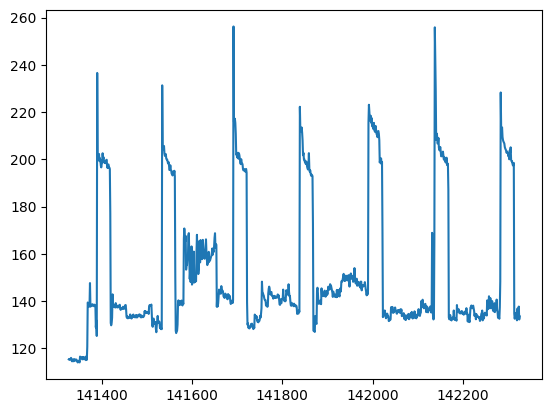

In [326]:
#data.tail(600)['Wh'].plot()
data['Wh'].plot()

In [327]:
data['Wh']

141327    115.273775
141328    115.155780
141329    115.295926
141330    115.159464
141331    115.540150
             ...    
142322    134.243204
142323    133.224780
142324    137.635724
142325    132.178000
142326    133.491546
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

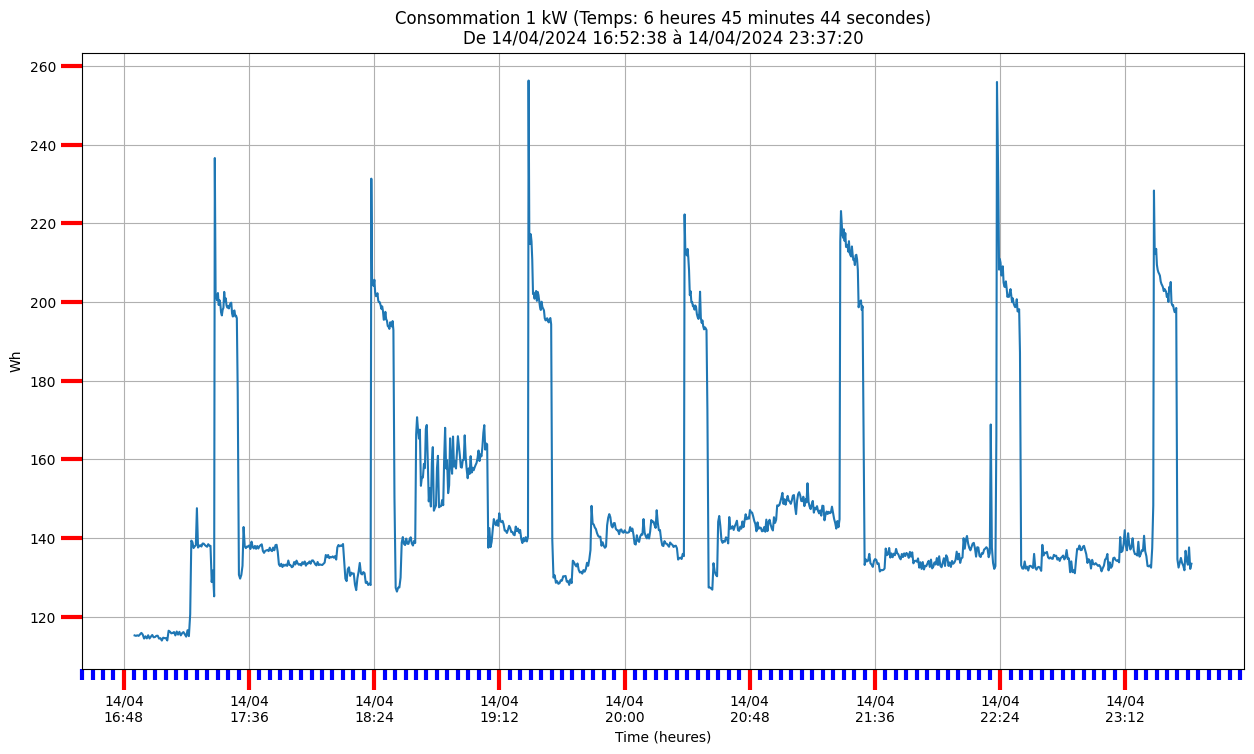

In [328]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 8)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

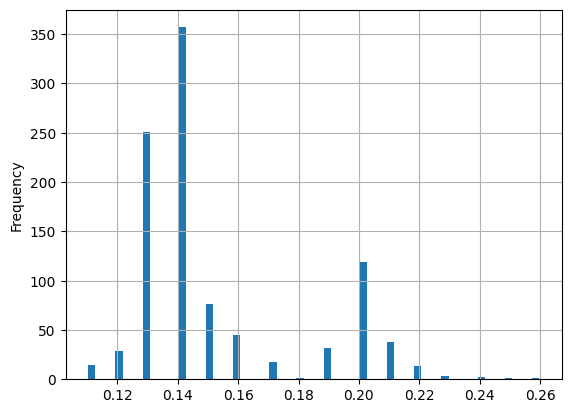

In [329]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [330]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates,days
142322,26817,0.13,26.817,134.243204,3361911204,2024-04-14 23:35:33.357911,14/04/2024
142323,27022,0.13,27.022,133.224780,3361938226,2024-04-14 23:36:00.379911,14/04/2024
142324,26156,0.14,26.156,137.635724,3361964382,2024-04-14 23:36:26.535911,14/04/2024
142325,27236,0.13,27.236,132.178000,3361991618,2024-04-14 23:36:53.771911,14/04/2024
142326,26968,0.13,26.968,133.491546,3362018586,2024-04-14 23:37:20.739911,14/04/2024


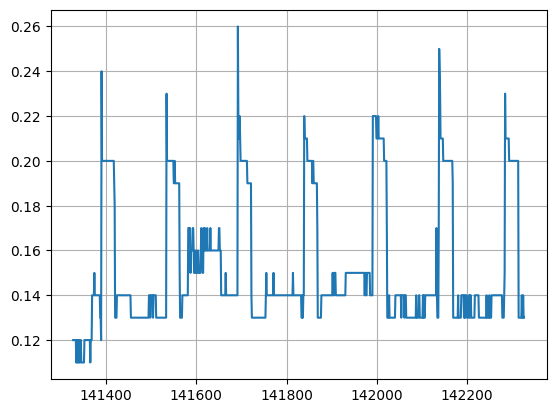

In [331]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [332]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(3362018586000.0, 56033.6431)

In [333]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 4, 14, 23, 37, 31, 756586),
 datetime.datetime(2024, 3, 7, 1, 43, 53, 170586))

In [334]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(142327, 3362019, 933.8941666666667)

In [335]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [336]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [337]:
732/12 # 60 jours

61.0

In [338]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

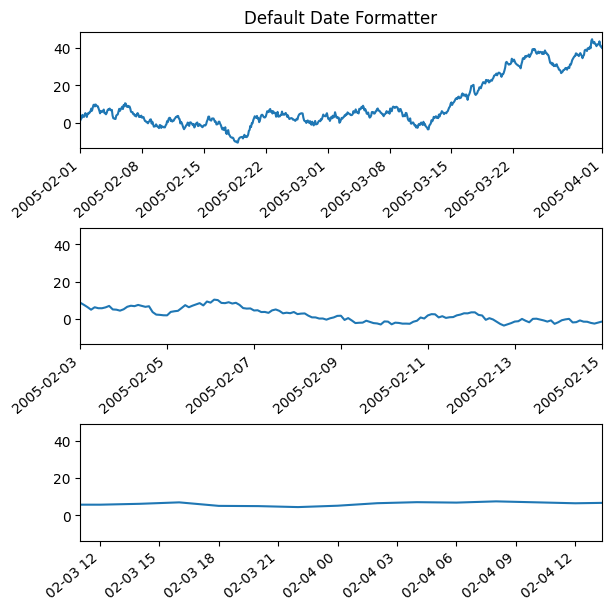

In [339]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [340]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)